In [4]:
# import libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# data load
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
df_DA_US = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [9]:
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])
df_DA_US_exploded = df_DA_US.explode('job_skills')
df_DA_US_exploded[['salary_year_avg','job_skills']].head(5)

,salary_year_avg,job_skills
1681,111175.0,sql
1681,111175.0,tableau
1681,111175.0,power bi
1681,111175.0,excel
3237,120000.0,sql


In [17]:
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})
df_DA_count = len(df_DA_US)
df_DA_skills['skill_percentage'] = df_DA_skills['skill_count'] / df_DA_count * 100
skill_limit = 5
df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percentage'] > skill_limit]
df_DA_skills_high_demand

,skill_count,median_salary,skill_percentage
job_skills,,,
sql,714,87500.0,63.864043
excel,472,77500.0,42.218247
python,408,90000.0,36.493739
tableau,398,90000.0,35.599284
power bi,279,87500.0,24.955277
r,244,90000.0,21.824687
sas,200,84078.5,17.889088
powerpoint,102,77500.0,9.123435
word,89,75000.0,7.960644


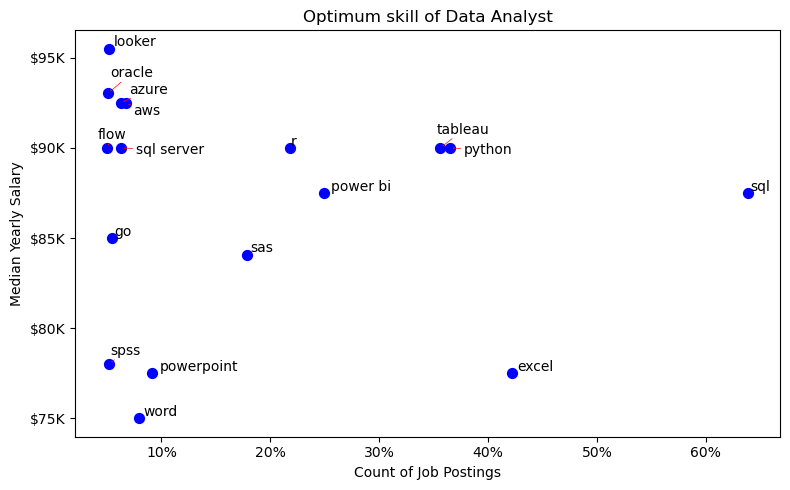

In [23]:
from adjustText import adjust_text

fig, ax = plt.subplots(figsize=(8, 5))  # figure size x and y
df_DA_skills_high_demand.plot(kind='scatter',x='skill_percentage',y='median_salary', ax=ax, color='b', s=50)
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percentage'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt, fontsize=10))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Optimum skill of Data Analyst')
plt.tight_layout()
plt.show()

In [37]:
df_technology = df['job_type_skills'].head(10)
df_technology = df_technology.drop_duplicates()
df_technology = df_technology.dropna()

combine_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in combine_dict:
            combine_dict[key] += value
        else:
            combine_dict[key] = value

for key, value in combine_dict.items():
    combine_dict[key] = list(set(value))

df_technology = pd.DataFrame(list(combine_dict.items()), columns=['technology', 'skills'])
df_technology = df_technology.explode('skills')
#df_technology

In [39]:
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

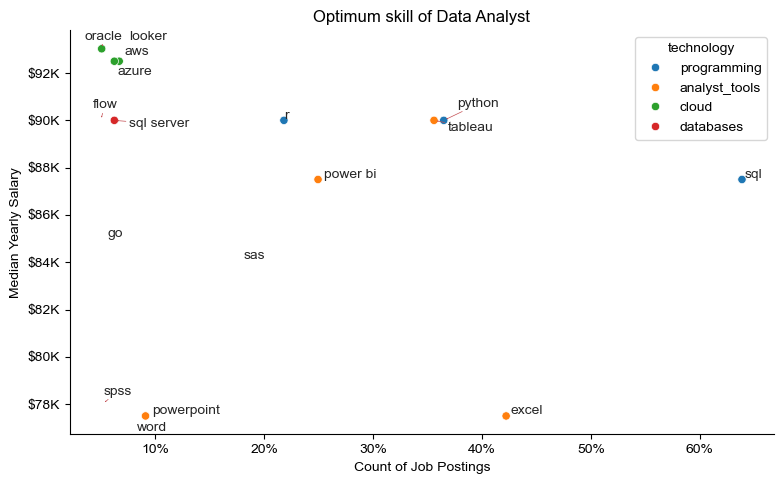

In [44]:
from adjustText import adjust_text

fig, ax = plt.subplots(figsize=(8, 5))  # figure size x and y
#df_plot.plot(kind='scatter',x='skill_percentage',y='median_salary', ax=ax, color='b', s=50)

sns.scatterplot(
    data=df_plot,
    x='skill_percentage',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percentage'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt, fontsize=10))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Optimum skill of Data Analyst')
plt.tight_layout()
plt.show()